# Importing Libraries and Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


# Importing the SBI Life Insurance Dataset

In [2]:
#importing the red wine dataset (in csv format)
#we are storing our dataset in "df" variable to make our job easier.
df=pd.read_csv('SBI-Life.csv')

We have successfully loaded the Dataset and stored it in variable "df"

# More Data Exploration

In [3]:
'''checking the first five rows of the Dataset to get the overview of the overall Data'''

df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


We can see from above Data  few points--

1. in column 'sex'

   0 =Female
   1 =Male
    
2. in 'smoker' column--
   
   0 =Non Smoker
   1 =Smoker
    
3. in 'insuranceclaim' column--

   0 =No
   1 =yes
    


Lets check for the number of rows and columns of the given Dataset

In [4]:
df.shape

(1338, 8)

This Dataset contains 1338 rows and 8 columns

Now to to get clear view of the Data lets see the names of the columns and differenciate between 

Target Variable and Input Variables

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

From above output we have observed that --

Target Variable=== 'insuranceclaim'

Rest all are input variables.

Now lets check the Datatypes of the valaus of each column

In [6]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

From above output we observe following points---

1. All variable are of Numeric Type

2. Variables "sex","smoker" and "insurancetype" are categotical variables.

3. Target variable is a Classification Variable.

# Checking Missing Values 

from above output,it is clearly visible that all the values of each column are either float type-- or integer type. one thing to be noticed here is that only output variable is in integer type ,all other variables-- --are in float type. Now lets check for sum of the missing values in each column-->

Now lets check for the missing values in the Dataset

In [7]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

Fortunately we have no null values in the Dataset.Our job is easier somewhat...isn't?

# Statistical Summary of the Dataset

now lets see the summary of the statistics of the dataset pertaining to the dataset columns, 

like mean,median,mode,standard deviation and IQR values. as the whole dataset is numeric so 

no need to worry for the dropping of any column as below function- --only works on numerical data.

In [8]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


# Outliers Detection

plotting the Boxplot for detecting the outliers present in Dataset

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

from the statistical summary of the Dataset we can observe that the difference between mean and max 

values is not very high except for the column 'charges'.

it means 'charges' have high chances of being the Outliers present in it.

Lets check ir through boxplot visualization

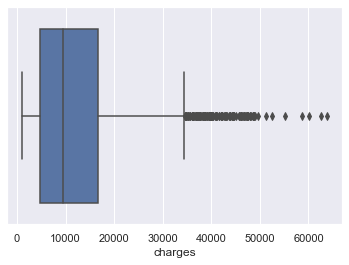

In [16]:
sns.boxplot(df.charges)

From above graph it can be observe that 'charges' have outliers.


# Removing Outliers from the Data

The distribution plot of the count values reveals that the count values do not match a normal
distribution. We will use the median and interquartile range (IQR) to identify and remove outliers 
from the data. (An alternative approach would be the transformation of the target values to a normal
distribution and using mean and standard deviation)

Samples in dataset with outliers: 1338
Samples in dataset without outliers: 1199


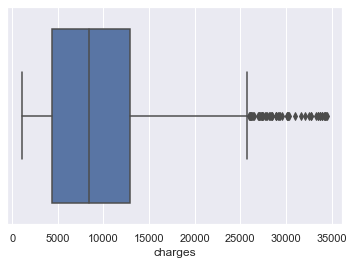

In [18]:
print("Samples in dataset with outliers: {}".format(len(df)))
q1 = df.charges.quantile(0.25)
q3 = df.charges.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
df_preprocessed = df.loc[(df.charges >= lower_bound) & (df.charges <= upper_bound)]
print("Samples in dataset without outliers: {}".format(len(df_preprocessed)))
sns.boxplot(df_preprocessed.charges);

# Checking the Skewness of the Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002010EC28160>,
      dtype=object)

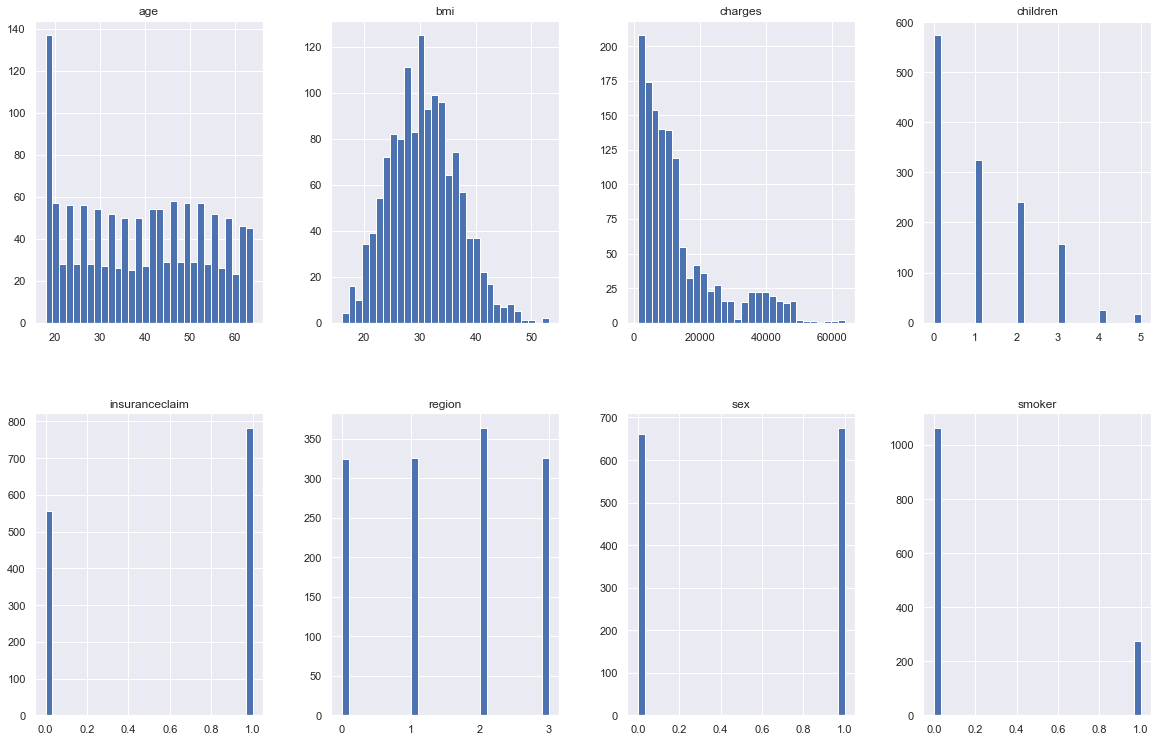

In [21]:
df.hist(figsize=(20,20), grid = True, layout = (3,4), bins = 30)

# Correlation Analysis

In [20]:
df.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


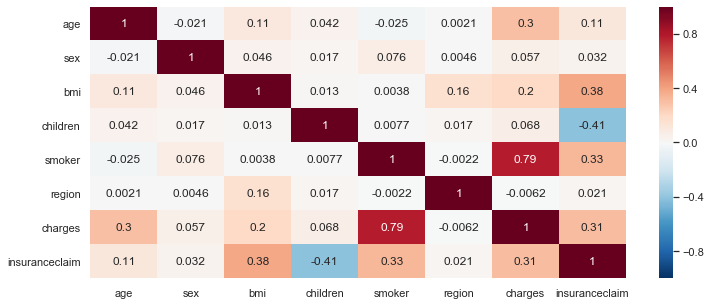

In [22]:
correlation = df.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [23]:
correlation['insuranceclaim'].sort_values(ascending=False)

insuranceclaim    1.000000
bmi               0.384198
smoker            0.333261
charges           0.309418
age               0.113723
sex               0.031565
region            0.020891
children         -0.409526
Name: insuranceclaim, dtype: float64

we can see that variables "bmi","smoker","charges","age" are having good correlation with target variable

"insuranceclaim"

# Univariate and Bivariate Analysis

Let's check how many unique values does the target feature 'insuranceclaim' has?

In [25]:
df["insuranceclaim"].unique()

array([1, 0], dtype=int64)

And how data is distributed among those values?

In [26]:
df.insuranceclaim.value_counts().sort_index()

0    555
1    783
Name: insuranceclaim, dtype: int64

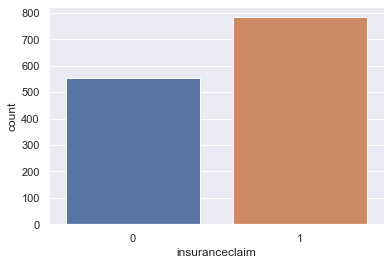

In [27]:
#plotting the graph for visualizing better the distribution of "insuranceclaim" variable.
sns.countplot(x='insuranceclaim', data=df)

The above graph shows people with insurance claim are more than non insurance claim

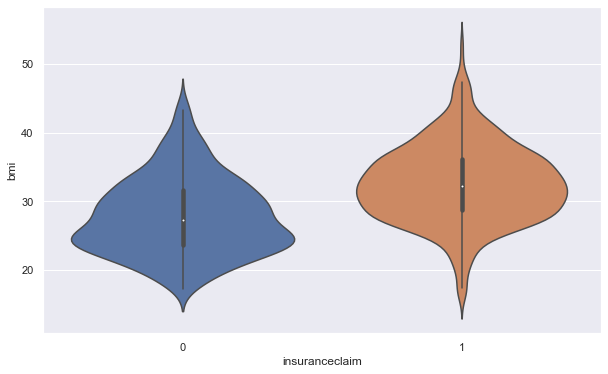

In [30]:
fig = plt.figure(figsize = (10,6))
sns.violinplot(x = 'insuranceclaim', y = 'bmi', data = df)

From above graph we can see that people with higher bmi tends to take more insurance claim

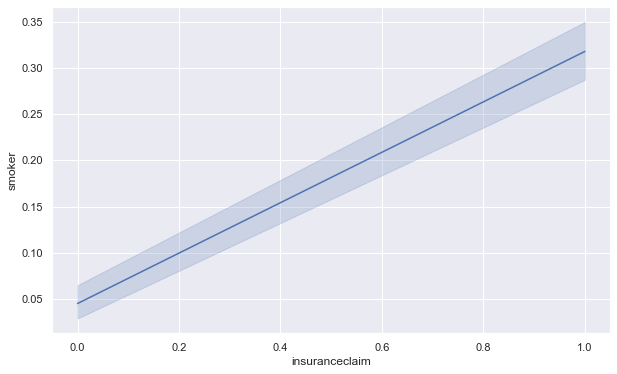

In [35]:
fig = plt.figure(figsize = (10,6))
sns.lineplot(x = 'insuranceclaim', y = 'smoker', data = df)

We can observe from above chart is that higher the smoking probability higher would be chances of

insurance claim

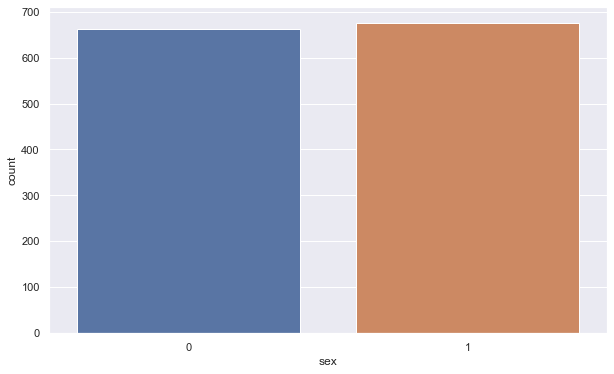

In [38]:
fig = plt.figure(figsize = (10,6))
sns.countplot(x = 'sex', data = df)

From above chart it is clear that there is not difference for females or males in insurance claimimg.

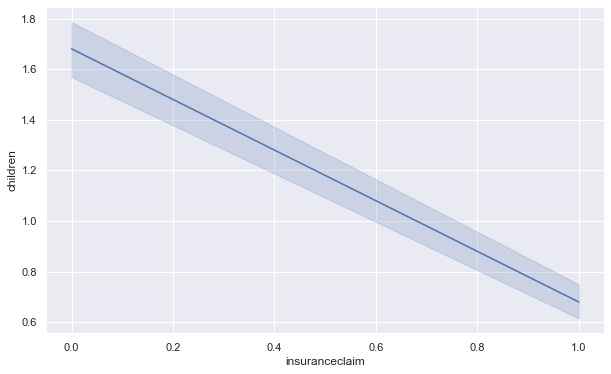

In [42]:
fig = plt.figure(figsize = (10,6))
sns.lineplot(x = 'insuranceclaim', y = 'children', data = df)

We can see from above graph that we are having negative correlation between number of children and

insurance claims

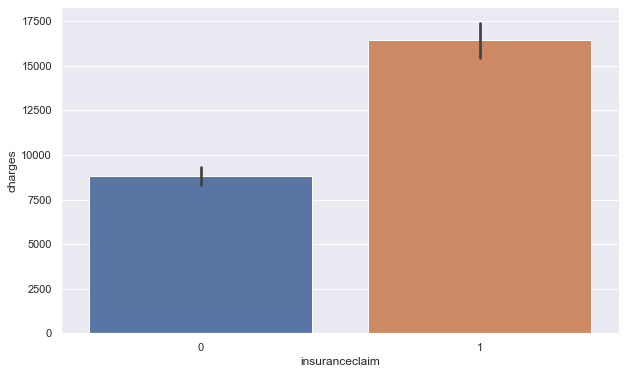

In [43]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'insuranceclaim', y = 'charges', data = df)

Higher the charges higher the chance of insurance claim

# Label Encoding/One Hot Encoding

In [45]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


When we go through the above data ,we can observe that all the categorial variables including Target

Variable are Label/One Hot Encoded.

So Label Encoding and One Hot Encoding is not required in this Dataset

# Now performing Train_Test_Split to separate target and input variables


seperating the dataset as response variable and feature variabes

In [46]:
x = df.drop('insuranceclaim', axis = 1)
y = df['insuranceclaim']

In [47]:
x.shape

(1338, 7)

In [48]:
y.shape

(1338,)

train test splitting of the data

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [51]:
x_train.shape

(1003, 7)

In [52]:
x_test.shape

(335, 7)

In [53]:
y_train.shape

(1003,)

In [54]:
y_test.shape

(335,)

train-test-split is done

# Applying Standardization Technique to get optimized results through Standard Scaler

In [55]:
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

Our training and testing data is ready now to perform machine learning algorithm

# Model Selection

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [57]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

In [58]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n ')

0.8656716417910447
[[114  18]
 [ 27 176]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       132
           1       0.91      0.87      0.89       203

    accuracy                           0.87       335
   macro avg       0.86      0.87      0.86       335
weighted avg       0.87      0.87      0.87       335


 
0.6686567164179105
[[120  12]
 [ 99 104]]
              precision    recall  f1-score   support

           0       0.55      0.91      0.68       132
           1       0.90      0.51      0.65       203

    accuracy                           0.67       335
   macro avg       0.72      0.71      0.67       335
weighted avg       0.76      0.67      0.66       335


 
0.8895522388059701
[[127   5]
 [ 32 171]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       132
           1       0.97      0.84      0.90       203

    accuracy                           0.89       

# Accuracy Scores for Training and Testing Datasets for various Models

Accuracy Scores for various Models----

Logistics Regression- 1.Training=86% 2.Testing=87%

Gaussian NB--- 1.Training=66% 2.Testing=67%

SVM---- 1.Training=88% 2.Testing=89%

Decision Tree Classifier--1.Training=94% 2.Testing=95%

Random Forest Classifier--1.Training=90.75% 2.Testing=90%

From above scores it is clear that the best model coming out to be DecisionTreeClassifier.

So we will do further processing of this model to avoid underfitting and underfitting which will

eventually increase the accuracy score and f1 score.

# Cross Validation Technique to avoid Overfitting and Underfitting on Decision Tree Classifier Model

In [64]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc2 = dtc.predict(x_test)

In [65]:
print(classification_report(y_test, pred_dtc2))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       132
           1       0.98      0.92      0.95       203

    accuracy                           0.94       335
   macro avg       0.94      0.95      0.94       335
weighted avg       0.95      0.94      0.94       335



In [66]:
#Now lets try to do some evaluation for random forest model using cross validation.
dtc_eval= cross_val_score(estimator = dtc, X = x_train, y = y_train, cv = 10)
dtc_eval.mean()

0.9740594059405941

We can clearly see that after applying Cross validation Technique our DTC F1 score increased

F1 score after cross validation is-- 97.50% 

# Storing the predicted results in csv file.

In [67]:
pred_dtc2 = pd.DataFrame(pred_dtc2, columns=['pred_dtc2']).to_csv('SBI-Life.csv')

# Saving the best Model as a pickle in a file

I have selected Decision Classifier Model as best model as it is giving me best accuracy score

after performing overfitting and underfitting through Cross Validation technique

In [69]:
from sklearn.externals import joblib

In [71]:
joblib.dump(dtc,'SBI-Life.pkl')

['SBI-Life.pkl']